In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,precision_recall_curve, auc, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [16]:
df = pd.read_csv("../preprocessed_dataset.csv")

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['month'] = df['trans_date_trans_time'].dt.month
winter_months = [10, 11, 12, 1, 2, 3]
summer_months = [4, 5, 6, 7, 8, 9]
df['winter'] = df['month'].apply(lambda x: 1 if x in winter_months else 0)
df['summer'] = df['month'].apply(lambda x: 1 if x in summer_months else 0)

services = ['food_dining', 'travel', 'personal_care', 'health_fitness', 'entertainment']
goods = ['shopping_pos', 'grocery_net', 'shopping_net', 'grocery_pos', 'gas_transport', 'misc_pos', 'misc_net', 'kids_pets', 'home']
df['Service'] = df['category'].apply(lambda x: 1 if x in services else 0)
df['Goods'] = df['category'].apply(lambda x: 1 if x in goods else 0)

df = df[['line_number', 'winter', 'summer', 'Service', 'Goods']]
df.to_csv('winter_summer_service_goods.csv', index=False)

              precision    recall  f1-score   support

           0       0.68      0.51      0.59      3157
           1       0.29      0.46      0.36      1392

    accuracy                           0.50      4549
   macro avg       0.49      0.49      0.47      4549
weighted avg       0.56      0.50      0.52      4549

[[1615 1542]
 [ 749  643]]


In [ ]:
X = df[['winter', 'summer']]
y = df['Service']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

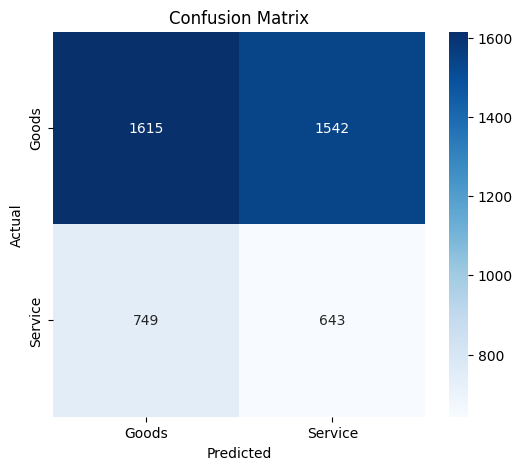

In [7]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Goods', 'Service'], yticklabels=['Goods', 'Service'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


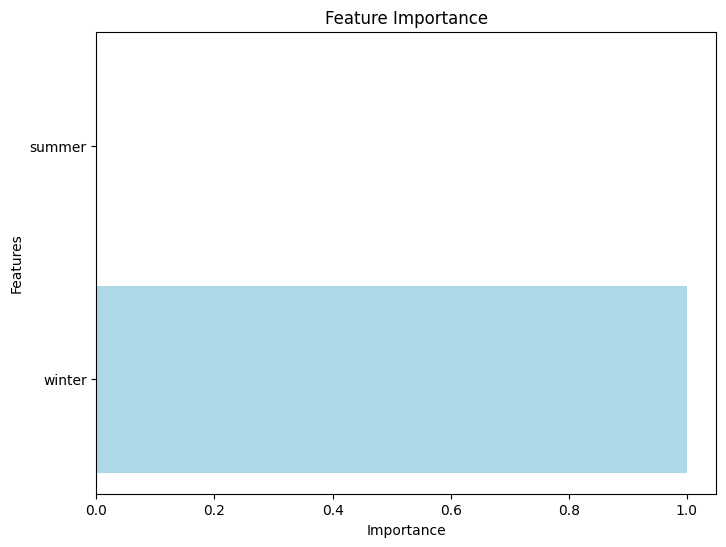

In [8]:
importances = clf.feature_importances_
features = ['winter', 'summer']

plt.figure(figsize=(8, 6))
plt.barh(features, importances, color='lightblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

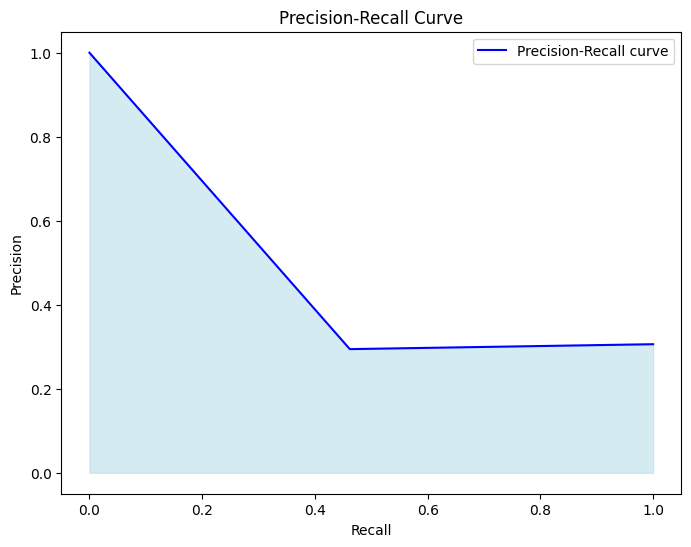

Area under the Precision-Recall curve: 0.46


In [9]:
precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label='Precision-Recall curve')
plt.fill_between(recall, precision, color='lightblue', alpha=0.5)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

pr_auc = auc(recall, precision)
print(f"Area under the Precision-Recall curve: {pr_auc:.2f}")

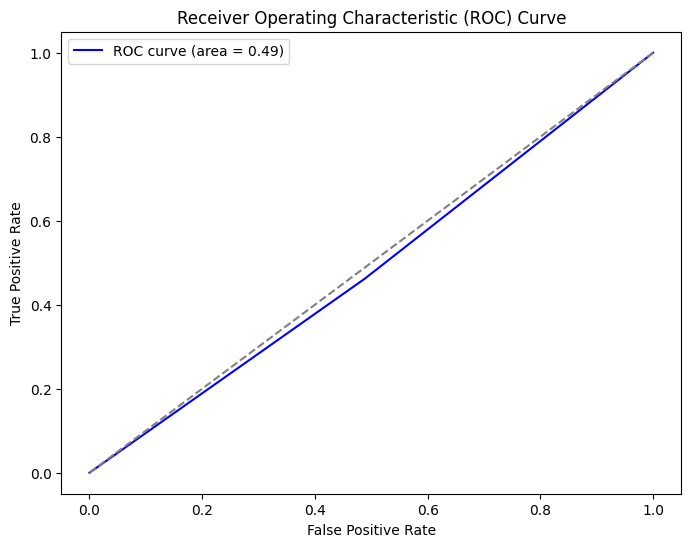

In [10]:
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

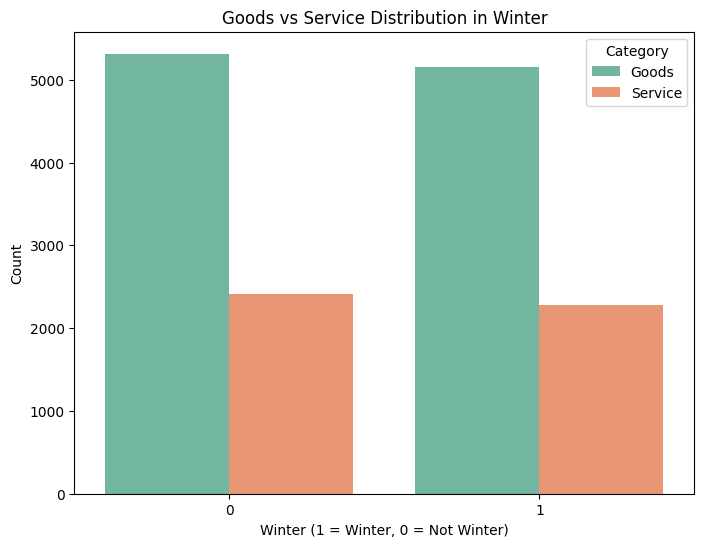

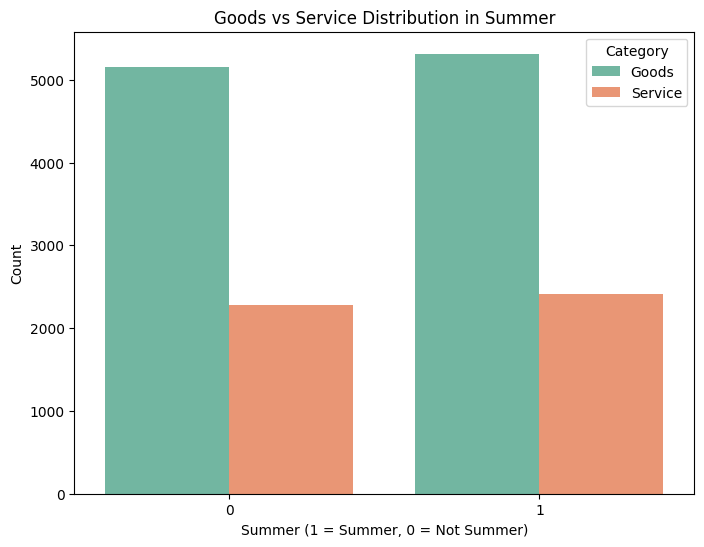

In [11]:
df['category_type'] = df['Service'].apply(lambda x: 'Service' if x == 1 else 'Goods')

plt.figure(figsize=(8, 6))
sns.countplot(x='winter', hue='category_type', data=df, palette='Set2')
plt.title('Goods vs Service Distribution in Winter')
plt.xlabel('Winter (1 = Winter, 0 = Not Winter)')
plt.ylabel('Count')
plt.legend(title='Category', loc='upper right')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='summer', hue='category_type', data=df, palette='Set2')
plt.title('Goods vs Service Distribution in Summer')
plt.xlabel('Summer (1 = Summer, 0 = Not Summer)')
plt.ylabel('Count')
plt.legend(title='Category', loc='upper right')
plt.show()

C:\Users\jarne\AppData\Local\Temp\ipykernel_964\1793111164.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette='Set2')


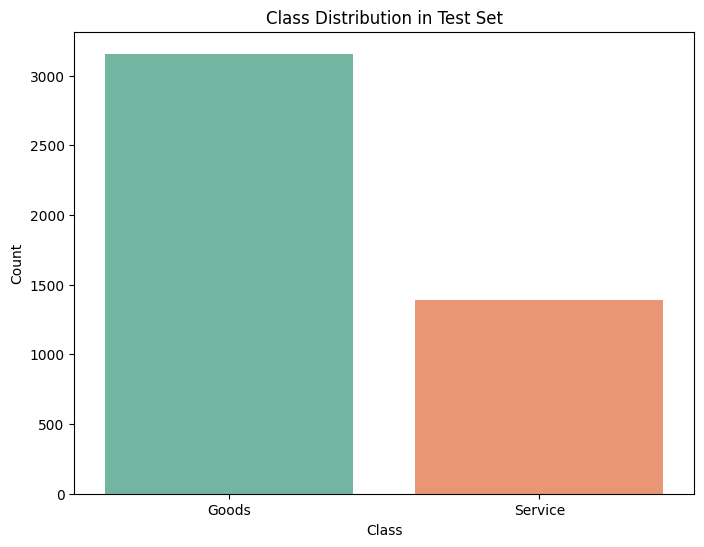

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_test, palette='Set2')
plt.title('Class Distribution in Test Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Goods', 'Service'])
plt.show()
